In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
import arrayfire as af
from matplotlib import pyplot as plt
import h5py

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import advection_2d
from dg_maxwell import global_variables as gvar
from dg_maxwell import utils
from dg_maxwell import wave_equation_2d
from dg_maxwell import isoparam
from dg_maxwell import lagrange
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


In [2]:
params.mesh_file = '../read_and_plot_mesh/mesh/square_mesh_4_parts.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

edge_reorded_mesh = msh_parser.rearrange_element_edges(advec_var.elements, advec_var)
advec_var.reassign_2d_elements(edge_reorded_mesh)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 441 nodes.
gmshTranslator: Mesh has 169 elements.
gmshTranslator: Processed 614 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed
arrayfire.Array()
Type: int

[100 4 1 1]
        99          5          1         45 
         0          6          2         46 
         1          7          3         47 
         2          8          4         48 
         3          9         95         49 
        94         10          6          0 
         5         11          7          1 
         6         12          8          2 
         7         13          9          3 
         8         14         90          4 
     

In [3]:
print(advec_var.interelement_relations)

arrayfire.Array()
Type: int

[100 4 1 1]
        99          5          1         45 
         0          6          2         46 
         1          7          3         47 
         2          8          4         48 
         3          9         95         49 
        94         10          6          0 
         5         11          7          1 
         6         12          8          2 
         7         13          9          3 
         8         14         90          4 
        89         15         11          5 
        10         16         12          6 
        11         17         13          7 
        12         18         14          8 
        13         19         85          9 
        84         20         16         10 
        15         21         17         11 
        16         22         18         12 
        17         23         19         13 
        18         24         80         14 
        79         25         21         15 
        20    

In [4]:
# for i in np.arange():
index = 0
h5py_data = h5py.File('../../results/2d_hdf5_%02d/dump_timestep_%06d' %(int(params.N_LGL), int(1 * index)) + '.hdf5', 'r')
u_LGL     = af.np_to_af_array(h5py_data['u_i'][:])
#     contour_2d(u_LGL, i)


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


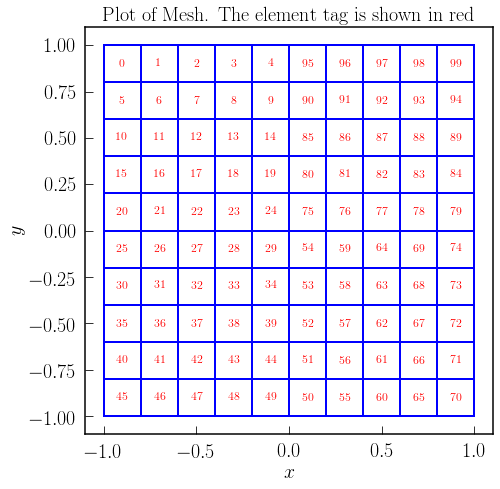

In [5]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True,
                          print_node_tag = False)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

plt.savefig('square.png')
plt.show()

In [14]:
print(contour(u_LGL, 80, advec_var)[2])

arrayfire.Array()
Type: double

[8 8 1 1]
    0.7788     0.7780     0.7707     0.7490     0.7108     0.6647     0.6257     0.6065 
    0.7534     0.7527     0.7456     0.7246     0.6876     0.6431     0.6053     0.5868 
    0.6959     0.6952     0.6887     0.6693     0.6351     0.5940     0.5591     0.5420 
    0.6146     0.6140     0.6082     0.5911     0.5609     0.5246     0.4938     0.4787 
    0.5253     0.5248     0.5199     0.5052     0.4794     0.4484     0.4220     0.4091 
    0.4465     0.4461     0.4419     0.4294     0.4075     0.3811     0.3587     0.3478 
    0.3918     0.3914     0.3878     0.3768     0.3576     0.3345     0.3148     0.3052 
    0.3679     0.3675     0.3641     0.3538     0.3357     0.3140     0.2955     0.2865 




In [5]:
def contour(u_e_ij, element_tag, advec_var):
    '''
    '''
    x_mesh = af.moddims(advec_var.x_e_ij[:, element_tag], d0 = params.N_LGL, d1 = params.N_LGL)
    y_mesh = af.moddims(advec_var.y_e_ij[:, element_tag], d0 = params.N_LGL, d1 = params.N_LGL)
    u_mesh = af.moddims(u_e_ij[:, element_tag], d0 = params.N_LGL, d1 = params.N_LGL)
    
    return (x_mesh, y_mesh, u_mesh)

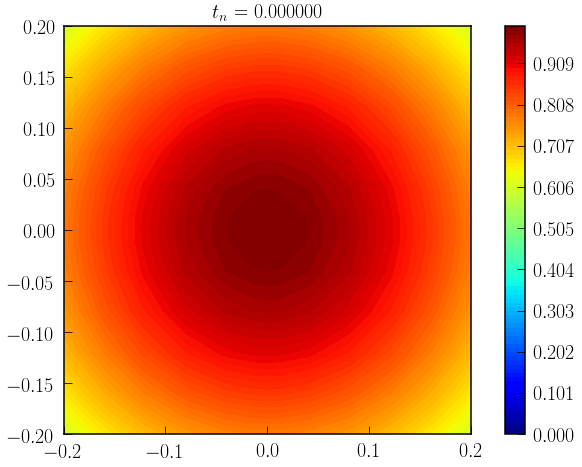

In [9]:
color_levels = np.linspace(0, 1, 100)

fig = plt.figure()

# for element_tag in np.arange(advec_var.elements.shape[0]):
element_tag = 75
x_contour, y_contour, u_contour = contour(u_LGL, element_tag, advec_var)
plt.contourf(np.array(x_contour), np.array(y_contour), np.array(u_contour),
             200, levels = color_levels, cmap = 'jet')

element_tag = 54
x_contour, y_contour, u_contour = contour(u_LGL, element_tag, advec_var)
plt.contourf(np.array(x_contour), np.array(y_contour), np.array(u_contour),
             200, levels = color_levels, cmap = 'jet')

element_tag = 29
x_contour, y_contour, u_contour = contour(u_LGL, element_tag, advec_var)
plt.contourf(np.array(x_contour), np.array(y_contour), np.array(u_contour),
             200, levels = color_levels, cmap = 'jet')

element_tag = 24
x_contour, y_contour, u_contour = contour(u_LGL, element_tag, advec_var)
plt.contourf(np.array(x_contour), np.array(y_contour), np.array(u_contour),
             200, levels = color_levels, cmap = 'jet')

# print(x_contour, y_contour, u_contour)

plt.contourf(np.array(x_contour), np.array(y_contour), np.array(u_contour),
             200, levels = color_levels, cmap = 'jet')
    
plt.gca().set_aspect('equal')
plt.colorbar()
plt.title(r'$t_n$ = %f' % (index * advec_var.delta_t_2d))
# fig.savefig('../../results/2D_Wave_images/%04d' %(index) + '.png', dpi = 100)
plt.show()
plt.close('all')